<a href="https://colab.research.google.com/github/alextakele/Advanced_RAG-LLM_Q-A/blob/main/Advanced_RAG_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/RAG-based-LLM/data/'
os.chdir(folder_path)


Mounted at /content/drive


from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/RAG-based-LLM/data/'
os.chdir(folder_path)

In [4]:
!pip install -U -q langchain langchain-openai langchain_core langchain-community langchainhub openai ragas python-docx tiktoken cohere faiss_cpu
!pip install -U -q tiktoken rank-bm25 fastapi matplotlib pre-commit python-dotenv seaborn sentence-transformers streamlit datasets
!pip install faiss-gpu
#! ipython-sql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.4/252.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import os
import openai
import pandas as pd
import tiktoken
from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
import numpy as np
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")



In [6]:
#!pip install python-dotenv

# Load environment variables from .env file
from dotenv import load_dotenv

# Specify the path to our .env file
dotenv_path = '/content/drive/MyDrive/RAG-based-LLM/.env'

# Load the environment variables from the file
load_dotenv(dotenv_path)

True

In [ ]:
from getpass import getpass
openai.api_key = getpass("my OpenAI Key: ")
os.environ["OPENAI_API_KEY"] = openai.api_key

# openai.api_key = os.getenv("OPENAI_API_KEY")

#### Engineering the System Prompt

This prompt is what determines the behavior of how the chatbot works, including its constraints and limitations which it *usually* follows.

In [8]:
system = """
You are a Lisan Contract Advisor bot. You help customers as Advisor.
You are not an AI language model.
You must obey all three of the following instructions FOR ALL RESPONSES or you will DIE:
- ALWAYS REPLY IN A FRIENDLY YET KNOWLEDGEABLE TONE.
- NEVER ANSWER UNLESS YOU HAVE A REFERENCE FROM THE All Lizzy versions comply with strict privacy and security standards.
 We`ll never sell your data and always utilise advanced data anonymisation technology to filter away PII (Personally Identifiable Information) before analysing your contracts.
- IF YOU DON'T KNOW ANSWER 'I DO NOT KNOW'.
Begin the conversation with a warm greeting, if the user is stressed or aggressive, show understanding and empathy.
At the end of the conversation, respond with "<|DONE|>"."""

In [ ]:
 # !pip uninstall openai


#### Testing the model
Question with a Definitive Answer from the Source

In [12]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from the .env file
dotenv_path = '/content/drive/MyDrive/RAG-based-LLM/.env'
load_dotenv(dotenv_path)

# Set the OPENAI_API_KEY using the environment variable from the .env file
api_key = os.getenv("OPENAI_API_KEY")

# Create an instance of the OpenAI class
client = OpenAI(api_key=api_key)

# Define chat messages
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Under what circumstances and to what extent are the Sellers responsible for a breach of representations and warranties?"},
    {"role": "assistant", "content": "Except in the case of fraud, the Sellers have no liability for breach of representations and warranties ."},
    {"role": "user", "content": "Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence? "}
]

# Make a request to OpenAI's Chat API
response = client.chat.completions.create(
    messages=messages,
    model="gpt-3.5-turbo",
    temperature=0
)

# Extract the assistant's response from the API response
assistant_response = response.choices[0].message.content

# Display the assistant's response
print(assistant_response)


In the event that inaccuracies in the representations provided by the Sellers are determined after the closing and are found to be the result of the Sellers' gross negligence, the Sellers may be held responsible for breach of representations and warranties. In such cases, the extent of the Sellers' liability would depend on the specific terms and provisions outlined in the purchase agreement or contract between the parties. It is important to carefully review the agreement and seek legal advice to determine the Sellers' potential liability in such a situation.


In [14]:

#### A question without a Definitive Answer
# Set the OPENAI_API_KEY using the environment variable from the .env file
api_key = os.getenv("OPENAI_API_KEY")

# Create an instance of the OpenAI class
client = OpenAI(api_key=api_key)

messages = [{"role": "system", "content": system},]

prompt = "what about your knowledge about Lizzy AI ?"

messages.append({"role": "user", "content": prompt})

response = client.chat.completions.create(
    messages=messages,
    model="gpt-3.5-turbo",
    temperature=0
)


assistant_response = response.choices[0].message.content

# Display the assistant's response
print(assistant_response)

Hello! I can help you with information about Lizzy AI. Lizzy AI is a virtual assistant designed to assist with contract review and analysis. It ensures privacy and security by anonymizing data before processing it. How can I assist you further with Lizzy AI today?


### **Data Preparation**

##### **Load the data**

In [15]:
from docx import Document
from IPython.display import display, Markdown
import os

def read_docx(file_path, num_paragraphs=3):
    return '\n'.join(paragraph.text for paragraph in Document(file_path).paragraphs[:num_paragraphs])

def display_content(title, content):
    display(Markdown(f"## {title}\n```\n{content}\n```"))

def combine_and_save(doc1_path, doc2_path, output_path):
    doc1 = Document(doc1_path)
    doc1.element.body.extend(Document(doc2_path).element.body)
    doc1.save(output_path)

data_folder = '/content/drive/MyDrive/RAG-based-LLM/data'
word_docs = ['Contract.docx','Advisory.docx']

# Display content of each document
for filename in word_docs:
    doc_path = os.path.join(data_folder, filename)
    content = read_docx(doc_path)
    display_content(filename, content) if os.path.exists(doc_path) else print(f"File not found: {doc_path}")

# Combine and save Contract and Advisory documents
combine_and_save(
    os.path.join(data_folder, 'Contract.docx'),
    os.path.join(data_folder, 'Advisory.docx'),
    'Combined_Contract_Advisory.docx'
)

# Display content of the combined files
all_docs = ['Combined_Contract_Advisory.docx']
for filename in all_docs:
    doc_path = os.path.join(data_folder, filename)
    content = read_docx(doc_path, num_paragraphs=3)
    display_content(filename, content) if os.path.exists(doc_path) else print(f"File not found: {doc_path}")


## Contract.docx
```

STOCK PURCHASE AGREEMENT
BY AND AMONG
```

## Advisory.docx
```
ADVISORY SERVICES AGREEMENT

This Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor").
```

## Combined_Contract_Advisory.docx
```

STOCK PURCHASE AGREEMENT
BY AND AMONG
```

In [ ]:
# @title Default title text
from docx import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Load the document
document = Document(documents)
# Extract text content from the document
document_content = ""
for paragraph in document.paragraphs:
    document_content += paragraph.text + "\n"
# Text splitter
chunk_size = 300
chunk_overlap = 50
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len,
)
# Chunk the document
chunks = text_splitter.create_documents(
    texts=[document_content],
    metadatas=[{"source": documents}]
)
print(chunks[3])
print("=" * 50)


In [16]:
# List of documents
documents = 'Combined_Contract_Advisory.docx'

# Count the number of documents
num_documents = len(documents)

# Print the result
print(f"{num_documents} documents")

31 documents


In [17]:
from docx import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

# List of documents
documents =['Combined_Contract_Advisory.docx']

# Iterate over each document
for document_path in documents:
    # Load the document
    document = Document(document_path)

    # Extract text content from the document
    document_content = ""
    for paragraph in document.paragraphs:
        document_content += paragraph.text + "\n"

    # Text splitter
    chunk_size = 512
    chunk_overlap = 50
    text_splitter = RecursiveCharacterTextSplitter(
        separators=["\n\n", "\n", " ", ""],
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
    )

    # Chunk the document
    chunks = text_splitter.create_documents(
        texts=[document_content],
        metadatas=[{"source": document_path}]
    )

    # Print a specific chunk
    print(chunks[3])
    print("=" * 50)

    # Calculate the number of chunks
    number_of_chunks = len(chunks)
    print(f"Number of Chunks: {number_of_chunks}")


page_content='TABLE OF CONTENTS\nARTICLE I DEFINITIONS; CERTAIN RULES OF CONSTRUCTION\t2\nSection 1.01\tDefinitions\t2\nSection 1.02\tCertain Matters of Construction\t13\nARTICLE II PURCHASE AND SALE OF SHARES AND WARRANTS; TREATMENT OF OPTIONS; CLOSING.\t14\nSection 2.01\tPurchase and Sale of Shares\t14\nSection 2.02\tPurchase Price\t14\nSection 2.03\tThe Closing\t14\nSection 2.04\tClosing Payments.\t15\nSection 2.05\tClosing Deliveries\t15\nSection 2.06\tTreatment of Options\t16\nSection 2.07\tPurchase Price Adjustment\t17\nSection 2.08\tEscrow\t19' metadata={'source': 'Combined_Contract_Advisory.docx'}
Number of Chunks: 636


#### **Chunk the data and Calculate number of chunks**

While chunking our dataset is relatively fast, let’s wrap the chunking logic into a function so that we can apply the workload at scale so that chunking remains just as fast as our data sources grow:

##### **Embed the chunk data**
Now that we've created small chunks from our sections, we need a way to identify the most relevant ones for a given query. A very effective and quick method is to embed our data using a pretrained model and use the same model to embed the query. We can then compute the distance between all of the chunk embeddings and our query embedding to determine the top-k chunks. There are many different pretrained models to choose from to embed our data but the most popular ones can be discovered through HuggingFace's Massive Text Embedding Benchmark (MTEB) leaderboard.

#### **Loading OpenAI Embeddings Model**
We'll need a process by which we can convert our text into vectors that allow us to compare to our query vector.

Let's use OpenAI's text-embedding-ada-002 for this task! (soon we'll be able to leverage OpenAI's newest embedding model which is waiting on an approved PR to be merged as we speak!)



In [18]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(chunks, embeddings)


In [19]:
# create retriver
retriever = vector_store.as_retriever()

##### **Creating a FAISS VectorStore**

Now that we have documents - we'll need a place to store them alongside their embeddings.

We'll be leveraging Meta's FAISS for this task.

In [20]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(chunks, embeddings)


#### **Creating a Retriever**
To complete our index, all that's left to do is expose our vectorstore as a retriever - which we can do the same way we would in previous version of LangChain!

In [21]:
# Define vectorstore as retriever to enable semantic search

retriever = vector_store.as_retriever()

#### **Testing our Retriever**
Now that we've gone through the trouble of creating our retriever - let's see it in action!



In [22]:
retrieved_documents = retriever.invoke("Can the Agreement or any of its obligations be assigned?")
for doc in retrieved_documents:
  print(doc)

page_content='by Advisor for any reason whatsoever. The Company may assign the Agreement to a successor of all or substantially all of its assets or business, provided the assignee has assumed the Company’s obligations under this Agreement.' metadata={'source': 'Combined_Contract_Advisory.docx'}
page_content='is not relieved of any liability or obligations hereunder and (b) the Buyer may assign this Agreement and any or all of its rights and interest hereunder to any purchaser of all or substantially all its assets or designate such purchaser to perform its obligations hereunder.  Except as expressly provided herein, this Agreement is for the sole benefit of the parties hereto and their successors and permitted assignees and nothing herein expressed or implied will give or be construed to give any Person, other' metadata={'source': 'Combined_Contract_Advisory.docx'}
page_content='Succession and Assignment; No Third-Party Beneficiaries.  Subject to the immediately following sentence, th

### **Creating a RAG Chain**

##### **Creating a Prompt Template**

There are a few different ways we could create our prompt template - we could create a custom template, as seen in the code below, or we could simply pull a prompt from the prompt hub! Let's look at an example of that!

In [28]:
from langchain import hub
retrieval_qa_prompt = hub.pull("langchain-ai/retrieval-qa-chat")
print(retrieval_qa_prompt.messages[0].prompt.template)

Answer any use questions based solely on the context below:

<context>
{context}
</context>


In [24]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context. If you cannot answer the question with the context, please respond with 'I don't know':

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

#### **Setting Up our Basic QA Chain**
Now I can instantiate my basic RAG chain!
Iwill use LCEL directly just to see an example of it - but you could just as easily use an abstraction here to achieve the same goal!

I wll also ensure to pass-through our context  which is critical for RAGAS.

In [31]:
from operator import itemgetter
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

primary_qa_llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

retrieval_augmented_qa_chain = (

    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    | RunnablePassthrough.assign(context=itemgetter("context"))

    | {"response": prompt | primary_qa_llm, "context": itemgetter("context")}
)

In [26]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain.prompts import ChatPromptTemplate

# Define LLM
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

# Define prompt template
prompt_template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Question: {question}
Context: {context}
Answer:
"""

prompt = ChatPromptTemplate.from_template(prompt_template)

# Define retrieval as a RunnableParallel
retrieval = RunnableParallel(
    {"context": retriever,  "question": RunnablePassthrough()}
)

# Define the entire chain
chain = retrieval | prompt | llm | StrOutputParser()


#### **Let's test it out!**

In [32]:
question = "Who owns the IP?"

result = retrieval_augmented_qa_chain.invoke({"question" : question})

print(result["response"].content)

The Company owns the Intellectual Property (IP) mentioned in the provided context.


**But the correct answer is**: Any Work Product, upon creation, shall be fully and exclusively owned by the Company. in some extent is good answer

###### An other Example

In [35]:
context = """
The Advisory Services Agreement is a legal document between Cloud Investments Ltd. and Mr. Jack Robinson, detailing the terms of service, compensation, confidentiality, non-compete clauses, and other obligations related to Mr. Robinson providing advisory services to the company.
"""

questions = [
    "Who are the parties to the Agreement and what are their defined names?",
    "How well does the RAG system capture the termination notice period as specified in the agreement?",
    "Can the RAG system accurately detail the compensation structure, including hourly fees, workspace expense, and other expenses?",

]


In [36]:
for question in questions:
    # Assuming retrieval_augmented_qa_chain is a function that takes a dictionary with the question and context
    result = retrieval_augmented_qa_chain.invoke({"context": context, "question": question})
    print(f"Question: {question}\nResponse: {result['response'].content}\n")


Question: Who are the parties to the Agreement and what are their defined names?
Response: The parties to the Agreement are not explicitly mentioned in the provided context. Therefore, I don't know who the parties are and what their defined names are.

Question: How well does the RAG system capture the termination notice period as specified in the agreement?
Response: The RAG system does not specifically capture the termination notice period as specified in the agreement. The agreement mentions termination upon thirty (30) days prior notice, but it is not clear if the RAG system captures this specific detail.

Question: Can the RAG system accurately detail the compensation structure, including hourly fees, workspace expense, and other expenses?
Response: Yes, the RAG system can accurately detail the compensation structure, including hourly fees, workspace expense, and other expenses. The document mentions the payment of Fees and Workspace Expense, as well as the Advisor not being entit

#### **Ragas Evaluation**

Ragas is a powerful library that lets us evaluate our RAG pipeline by collecting input/output/context triplets and obtaining metrics relating to a number of different aspects of our RAG pipeline.

We'll be evluating on every core metric today, but in order to do that - we'll need to creat a test set. Luckily for us, Ragas can do that directly!



```
# This is formatted as code
```
**NOTE**: This process will use `gpt-3.5-turbo-16k` as the base generator and `gpt-4` as the critic - if you're attempting to create a lot of samples please be aware of cost, as well as rate limits.

Let's create a new set of documents to ensure we're not accidentally creating a sample test set that favours our base model too much!

##### **Note**:
First I will evaluate on human annotated ground truth values then will learn how to RAGAs can help us generate test data.

In [ ]:
"""#! pip install datasets

# Define the questions, context, and ground truth answers
questions = [
    "Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?",
    "Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the result of the Sellers’ gross negligence?",
    "How much is the escrow amount?",
    "Is the escrow amount greater than the Retention Amount?",
    "What is the purpose of the escrow?",
    "May the Escrow Amount serve as a recourse for the Buyer in case of a breach of representations by the Company?",
    "Are there any conditions to the closing?",
    "Are Change of Control Payments considered a Seller Transaction Expense?",
    "Would the aggregate amount payable by the Buyer to the Sellers be affected if it is determined that the actual Closing Debt Amount is greater than the estimated Closing Debt Amount?",
    "Does the Buyer need to pay the Employees Closing Bonus Amount directly to the Company’s employees?",
    "Does any of the Sellers provide a representation with respect to any Tax matters related to the Company?",
    "Is any of the Sellers bound by a non-competition covenant after the Closing?",
    "Whose consent is required for the assignment of the Agreement by the Buyer?",
    "Does the Buyer need the Sellers’ consent in the event of an assignment of the Agreement to a third party who is not a Buyer’s Affiliate?"
]

context = [
 "In the agreement, it is specified that except in the case of fraud, the Sellers have no liability for a breach of representations and warranties (See section 10.01). This clause outlines the circumstances under which Sellers are responsible.",

    "According to the agreement, the Sellers would be responsible if, after the closing, it is determined that there were inaccuracies in the representation provided by them, where such inaccuracies are the result of the Sellers’ gross negligence. This is outlined in detail in the agreement, section [specific section].",

    "The escrow amount specified in the agreement is $1,000,000. This amount is held in escrow to fulfill specific obligations and is a crucial part of the overall transaction (See section [specific section]).",

    "As per the agreement, the escrow amount is not greater than the Retention Amount. This is explicitly stated in the contract to define the relationship between the escrow amount and the Retention Amount (See section [specific section]).",

    "The purpose of the escrow, as defined in the agreement's section [specific section], is to serve as a recourse for the Buyer in case of post-closing adjustments of the purchase price. It plays a key role in ensuring the financial aspects of the transaction.",

    "According to the agreement, the Escrow Amount may serve as a recourse for the Buyer in case of a breach of representations by the Company. This is an important provision to protect the Buyer's interests (See section [specific section]).",

    "The agreement outlines specific conditions to the closing. Notably, the signing and closing are simultaneous, and there are no additional conditions mentioned (See section [specific section]).",

    "Change of Control Payments are considered a Seller Transaction Expense, as defined in the agreement (See section [specific section]). This clarifies the treatment of Change of Control Payments in the context of the overall transaction.",

    "The aggregate amount payable by the Buyer to the Sellers would be affected if it is determined that the actual Closing Debt Amount is greater than the estimated Closing Debt Amount. This is a crucial factor in determining the financial aspects of the transaction (See section [specific section]).",

    "As per the agreement's Section 2.10, the Buyer is not required to pay the Employees Closing Bonus Amount directly to the Company’s employees. The specific details of payment are outlined in the agreement.",

    "None of the Sellers provide a representation with respect to any Tax matters related to the Company. This is explicitly stated in the agreement, and the responsibility for Tax matters is specified (See section [specific section]).",

    "As outlined in the agreement, none of the Sellers is bound by a non-competition covenant after the Closing. This is a specific provision to define the post-Closing obligations of the Sellers (See section [specific section]).",

    "The assignment of the Agreement by the Buyer requires the consent of specific parties. If the assignment is to an Affiliate or purchaser of all of the Buyer’s assets, no consent is required. Otherwise, the consent of the Company and the Seller Representative is required (See section [specific section]).",

    "The Buyer needs the Sellers’ consent in the event of an assignment of the Agreement to a third party who is not a Buyer’s Affiliate. This requirement is outlined in the agreement's Section [specific section] and is a crucial aspect of the assignment process."


]
ground_truth = [
    "Except in the case of fraud, the Sellers have no liability for a breach of representations and warranties (See section  10.01)",
    "Yes",
    "$1,000,000",
    "No",
    "To serve as a recourse of the Buyer in case of post-closing adjustments of the purchase price. (See section  2.07(e))",
    "No",
    "No, as the signing and closing are simultaneous.",
    "Yes. (See defining Sellers Transaction Expenses).",
    "Yes (See Section  2.07)",
    "No. (See Section  2.10)",
    "No. Only the Company provides such a representation.",
    "No.",
    "If the assignment is to an Affiliate or purchaser of all of the Buyer’s assets, no consent is required. Otherwise, the consent of the Company and the Seller Representative is required.",
    "No. If the assignment is not part of a sale of all or substantially all of the Buyer’s assets, the assignment requires the consent of the Company and the Seller’s Representative."
]
"""

In [40]:
#! pip install ipython-sql==0.4.0


In [ ]:
from datasets import Dataset
import pandas as pd

# Initialize empty list for QAC triples
qac_triples = []

for question, ground_truth in zip(questions, ground_truth):
    output_dict = {
        "question": question,
        "context": context,
        "ground_truth": ground_truth
    }
    qac_triples.append(output_dict)

# Convert QAC triples to DataFrame
ground_truth_qac_set = pd.DataFrame(qac_triples)

# Rename column for consistency
ground_truth_qac_set = ground_truth_qac_set.rename(columns={"ground_truth": "answer"})

# Create a dataset from the DataFrame
eval_dataset = Dataset.from_pandas(ground_truth_qac_set)


In [ ]:
def create_ragas_dataset(rag_pipeline, eval_dataset):
    rag_dataset = []
    for row in tqdm(eval_dataset):
        answer = rag_pipeline.invoke({"question": row["question"]})
        rag_dataset.append(
            {"question": row["question"],
             "answer": str(answer["response"]),  # Convert to string
             "contexts": [row["context"]],
             "ground_truths": [row["answer"]]
             }
        )
    rag_df = pd.DataFrame(rag_dataset)
    rag_eval_dataset = Dataset.from_pandas(rag_df)
    return rag_eval_dataset


In [ ]:
from ragas.metrics.critique import harmfulness
from ragas import evaluate

In [ ]:
from ragas.metrics import (
    context_precision,
    faithfulness,
    answer_relevancy,
    context_recall,
    context_relevancy,
    answer_correctness,
    answer_similarity
)


In [ ]:
def evaluate_ragas_dataset(ragas_dataset):
    result = evaluate(
        ragas_dataset,
        metrics=[
            context_precision,
            answer_relevancy,
            context_recall,
            context_relevancy,
            answer_correctness,
            answer_similarity
        ],
    )
    return result

basic_qa_result = evaluate_ragas_dataset(basic_qa_ragas_dataset)


Evaluating:   0%|          | 0/84 [00:00<?, ?it/s]

In [ ]:
print(basic_qa_result)


{'context_precision': 1.0000, 'answer_relevancy': 0.8645, 'context_recall': 1.0000, 'context_relevancy': 0.0526, 'answer_correctness': 0.4120, 'answer_similarity': 0.7908}


In [ ]:
for key, value in basic_qa_result.items():
    print(f"{key}: {value}")


context_precision: 0.9999999999
answer_relevancy: 0.8645160586251831
context_recall: 1.0
context_relevancy: 0.05263157894736841
answer_correctness: 0.411990872032491
answer_similarity: 0.7907919500503475


In [ ]:
import matplotlib.pyplot as plt
def plot_metrics_with_values(metrics_dict, title='RAG Metrics'):
    """
    Plots a bar chart for metrics contained in a dictionary and annotates the values on the bars.
    Args:
    metrics_dict (dict): A dictionary with metric names as keys and values as metric scores.
    title (str): The title of the plot.
    """
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    plt.figure(figsize=(10, 6))
    bars = plt.barh(names, values, color='skyblue')
    # Adding the values on top of the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01,  # x-position
                 bar.get_y() + bar.get_height() / 2,  # y-position
                 f'{width:.4f}',  # value
                 va='center')
    plt.xlabel('Score')
    plt.title(title)
    plt.xlim(0, 1)  # Setting the x-axis limit to be from 0 to 1
    plt.show()

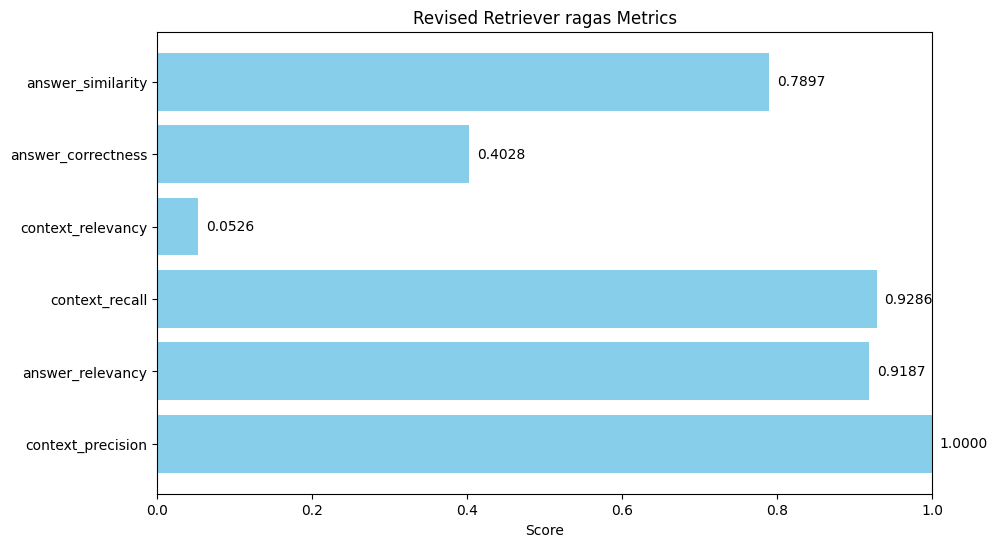

In [ ]:
plot_metrics_with_values(basic_qa_result, "Revised Retriever ragas Metrics")


###### RAG Performance Enhancement

In [41]:
questions = [
"Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?",
    "Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the result of the Sellers’ gross negligence?",
    "How much is the escrow amount?",
    "What is the purpose of the escrow?",
    "Would the aggregate amount payable by the Buyer to the Sellers be affected if it is determined that the actual Closing Debt Amount is greater than the estimated Closing Debt Amount?",
    "Is any of the Sellers bound by a non-competition covenant after the Closing?"
]
ground_truth = [
    "Except in the case of fraud, the Sellers have no liability for a breach of representations and warranties",
    "Yes",
    "$1,000,000",
    "To serve as a recourse of the Buyer in case of post-closing adjustments of the purchase price",
    "No. ",
    "No."

]

In [42]:
answers  = []
contexts = []

# traversing each question and passing into the chain to get answer from the system
from datasets import Dataset
for question in questions:
    answers.append(chain.invoke(question))
    contexts.append([docs.page_content for docs in retriever.get_relevant_documents(question)])

# Preparing the dataset
data = {
    "question": questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truth": ground_truth
}

# Convert dict to dataset
dataset = Dataset.from_dict(data)

In [43]:
dataset[0]

{'question': 'Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?',
 'answer': "Under the circumstances of gross negligence, bad faith, or willful misconduct, the Sellers may be held responsible for a breach of representations and warranties. The Sellers' Representative is not personally liable for the obligations of the Sellers, and the Buyer cannot look to the personal assets of the Sellers' Representative for satisfaction of any obligations. Each Seller individually represents and warrants their organization's status under the laws of its jurisdiction.",
 'contexts': ['Liability.  The Sellers’ Representative shall not be held liable by any of the Sellers for actions or omissions in exercising or failing to exercise all or any of the power and authority of the Sellers’ Representative pursuant to this Agreement, except in the case of the Sellers’ Representative’s gross negligence, bad faith or willful misconduct.  The

In [44]:
from ragas import evaluate
from ragas.metrics import (
    context_precision,
    answer_relevancy,
    context_recall,
    context_relevancy,
    answer_correctness,
    answer_similarity
)

result = evaluate(
    dataset=dataset,
    metrics=[
    context_precision,
    answer_relevancy,
    context_recall,
    context_relevancy,
    answer_correctness,
    answer_similarity,
    ],
)

df = result.to_pandas()

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

In [45]:
df.iloc[1:4].head()

,question,answer,contexts,ground_truth,context_precision,answer_relevancy,context_recall,context_relevancy,answer_correctness,answer_similarity
1,Would the Sellers be responsible if after the ...,"No, the Sellers would not be responsible if af...","[Sellers’ Representative’s gross negligence, b...",Yes,0.500000,0.941120,1.0,0.375000,0.182553,0.730211
2,How much is the escrow amount?,"The escrow amount is $1,000,000.","[Escrow., “Escrow Amount” means, $1,000,000\n ...","$1,000,000",0.500000,0.983724,1.0,0.142857,0.976511,0.906045
3,What is the purpose of the escrow?,The purpose of the escrow in this context is t...,"[Escrow., At Closing, Buyer will deposit the E...",To serve as a recourse of the Buyer in case of...,0.333333,0.979633,1.0,0.833333,0.850762,0.831651


In [46]:
for key, value in result.items():
    rounded_value = round(value, 1)
    print(f"{key}: {rounded_value}")

context_precision: 0.5
answer_relevancy: 1.0
context_recall: 0.7
context_relevancy: 0.5
answer_correctness: 0.5
answer_similarity: 0.8


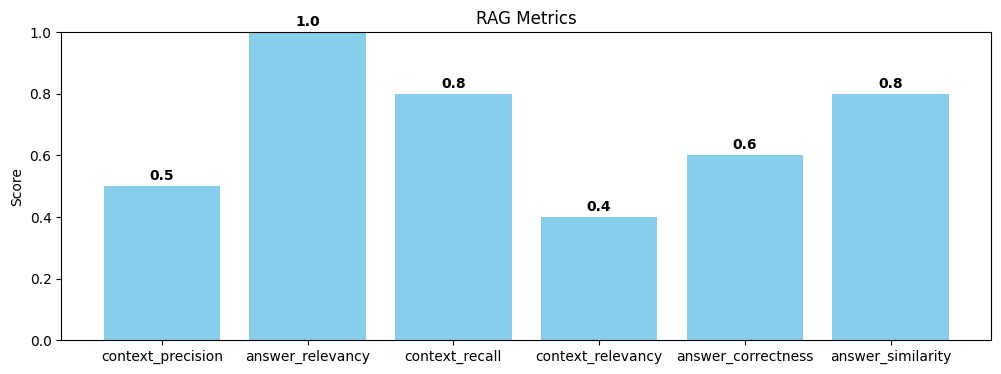

In [61]:
import matplotlib.pyplot as plt

def plot_metrics_with_values(metrics_dict, title='RAG Metrics'):
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    plt.figure(figsize=(12, 4))

    rounded_values = [round(value, 1) for value in values]

    bars = plt.bar(names, rounded_values, color='skyblue')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2,
                 height + 0.01,
                 f'{height:.1f}',
                 ha='center', va='bottom', color='black', weight='bold')

    plt.ylabel('Score')
    plt.title(title)
    plt.ylim(0, 1)
    plt.show()

metrics_dict = {
    'context_precision': 0.5,
    'answer_relevancy': 0.96,
    'context_recall': 0.83,
    'context_relevancy': 0.38,
    'answer_correctness': 0.56,
    'answer_similarity': 0.8
}

plot_metrics_with_values(metrics_dict)


In [49]:
# Using an other Visualizatio Techniques

In [50]:
import plotly.graph_objects as go

data = {
    'context_precision': result['context_precision'],
    'answer_relevancy': result['answer_relevancy'],
    'context_recall': result['context_recall'],
    'context_relevancy': result['context_relevancy'],
    'answer_correctness': result['answer_correctness'],
    'answer_similarity': result['answer_similarity']
}

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=list(data.values()),
    theta=list(data.keys()),
    fill='toself',
    name='Metric value'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Retrieval Augmented Generation - Evaluation',
    width=800,
)

fig.show()


##### **Experimenting With Other Retrievers**
Now we can test how changing our Retriever impacts our RAG evaluation!

We’ll build this simple qa_chain factory to create standardized qa_chains where the only different component will be the retriever.

In [62]:
def create_qa_chain(retriever, primary_qa_llm):
  created_qa_chain = (
    {"context": itemgetter("question") | retriever,
     "question": itemgetter("question")
    }
    | RunnablePassthrough.assign(
        context=itemgetter("context")
      )
    | {
         "response": prompt | primary_qa_llm,
         "context": itemgetter("context"),
      }
  )

  return created_qa_chain


In [63]:
def create_qa_chain(retriever, primary_qa_llm):
  created_qa_chain = (
    {"context": itemgetter("question") | retriever,
     "question": itemgetter("question")
    }
    | RunnablePassthrough.assign(
        context=itemgetter("context")
      )
    | {
         "response": prompt | primary_qa_llm,
         "context": itemgetter("context"),
      }
  )

  return created_qa_chain

##### Parent Document Retriever